In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import pathlib
from scipy.interpolate import interp1d

In [5]:
m = loadmat('sargolini2006/all_data/10073-17010302_eeg.mat')

In [8]:
data_path = pathlib.Path('sargolini2006/all_data/')

In [15]:
data = {}
for fname in data_path.iterdir():
    if not fname.is_file():
        continue
    try:
        action, ftype = fname.stem.split('_')
    except Exception as e:
        print(fname)
        raise e
    if ftype == 'EGF':
        continue
    if action not in data:
        data[action] = {}
    data[action][ftype] = loadmat(fname)


In [25]:
action = data['10704-08070402']
x, y, t = map(action['POS'].get, ['posx', 'posy', 'post'])

In [54]:
import pandas as pd

In [77]:
analog, cells = [], []
for k, v in data.items():
    if 'POS' not in v:
        continue
    if set(['EEG', 'EG2']).intersection(set(v.keys())) == set():
        continue
    analog.append({
        'action': k, 
        'eeg': None if 'EEG' not in v else v['EEG']['EEG'], 
        'eeg2': None if 'EG2' not in v else v['EG2']['EEG'],
        'x': v['POS']['posx'],
        'y': v['POS']['posy'],
        't': v['POS']['post']
    })
    for kk, vv in v.items():
        if kk.startswith('T'):
            cells.append({
                'action': k,
                'channel': kk[1],
                'unit': kk[3:],
                'spikes': vv['cellTS']
            })

In [78]:
analog = pd.DataFrame(analog)
cells = pd.DataFrame(cells)

In [79]:
cells

action channel unit  \
0    10704-08070402       1    3   
1    10704-08070402       1    2   
2    10704-08070402       4    5   
3    10704-08070402       4    2   
4    10704-08070402       2    1   
..              ...     ...  ...   
453  11084-09030503       2    2   
454  10884-08070405       4    2   
455  11138-08040501       7    1   
456  11016-02020502       5    1   
457  11016-02020502       7    1   

                                                spikes  
0    [[1.9145208333333332], [2.144375], [2.22252083...  
1    [[0.4719583333333333], [1.0331770833333334], [...  
2    [[0.23117708333333334], [0.2521979166666667], ...  
3    [[2.9638541666666667], [4.54359375], [5.202333...  
4    [[4.531625], [4.648020833333334], [5.679010416...  
..                                                 ...  
453  [[0.98903125], [1.9578645833333332], [2.223593...  
454  [[2.1585], [2.2601458333333335], [2.3705625], ...  
455  [[3.645072916666667], [3.6803020833333333], [3...  
456  [[3.2897708333333333], [3.314229166666667], [3...  
457  [[0.44884375], [0.53609375], [0.56032291666666...  

[458 rows x 4 columns]

In [87]:
l = analog.apply(lambda x: len(x.eeg), axis=1)

In [90]:
min(l)

150000

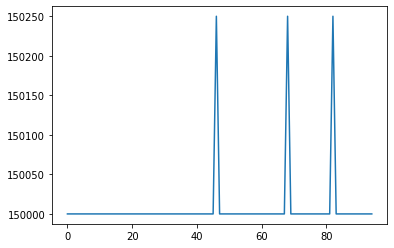

In [89]:
plt.plot(l)

In [35]:
t.shape, x.shape, y.shape

((30000, 1), (30000, 1), (30000, 1))

In [36]:
x, y, t = x.ravel(), y.ravel(), t.ravel()

In [37]:
sx, sy = interp1d(t, x), interp1d(t, y)

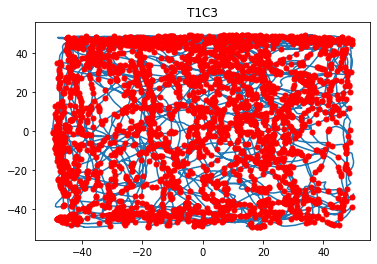

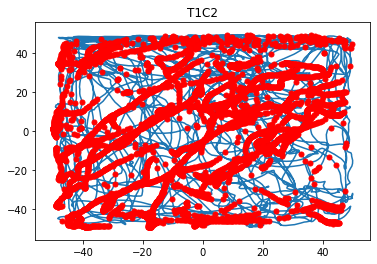

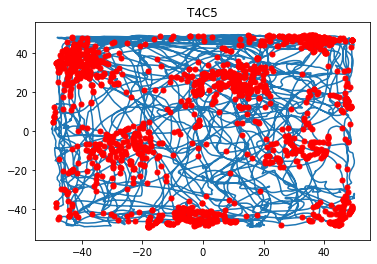

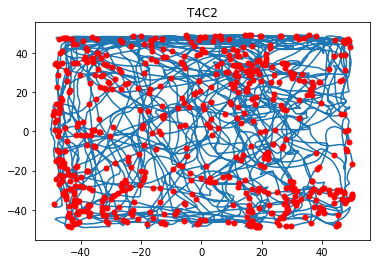

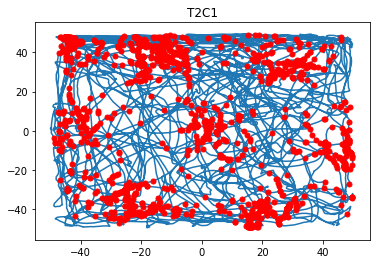

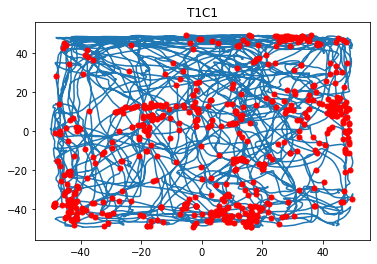

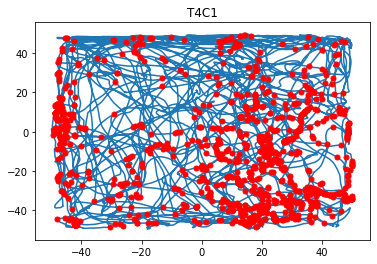

In [49]:
for key in action.keys():
    if key[0] != 'T':
        continue
    spikes = action[key]['cellTS']
    spikes = spikes[(spikes > t[0]) & (spikes <= t[-1])]
    plt.figure()
    plt.plot(x,y)
    plt.scatter(sx(spikes), sy(spikes), marker='.', s=100, c='r', zorder=100)
    plt.title(key)